In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_1samp

# df = pd.read_csv('/content/drive/MyDrive/ECE 225 Project/zomato.csv')
df = pd.read_csv('zomato.csv')

###EDA

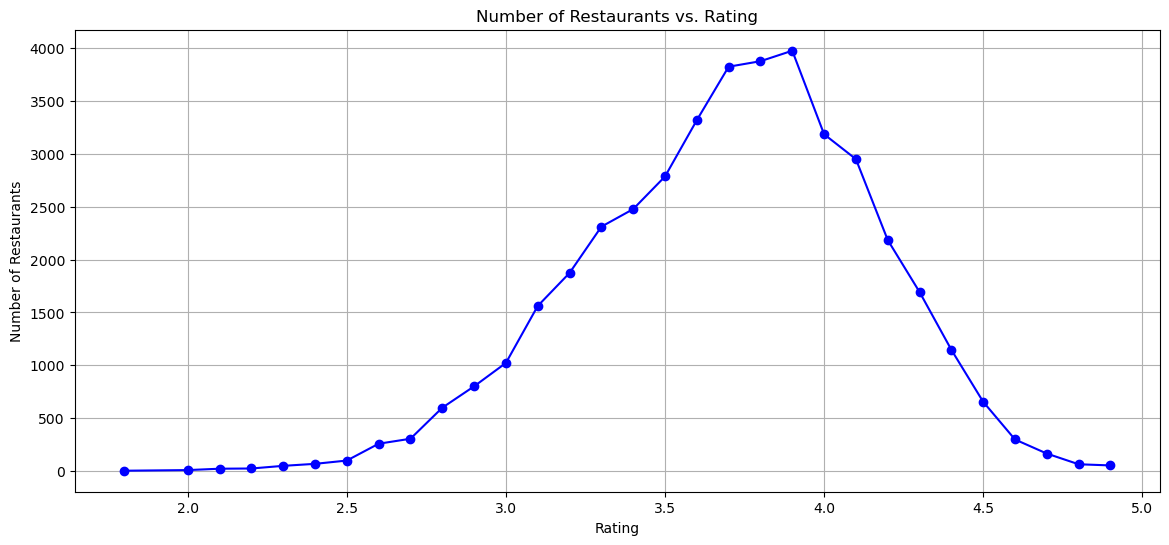

In [3]:
df['rate'] = df['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
# Group the data by ratings and count the number of restaurants for each rating
ratings_group = df.groupby('rate').size()

# Creating the plot
plt.figure(figsize=(14, 6))
ratings_group.plot(kind='line', marker='o', color='blue')
plt.title('Number of Restaurants vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()

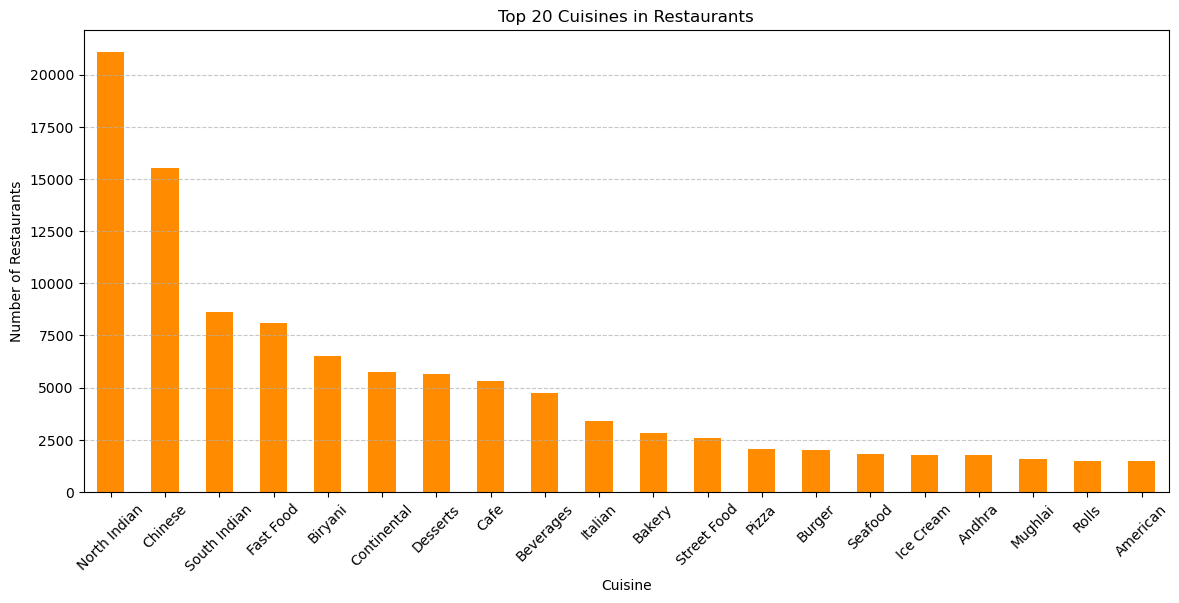

In [4]:
cuisine_counts = df['cuisines'].dropna().str.split(', ').explode().value_counts()

# Creating the plot for the number of restaurants vs cuisine
plt.figure(figsize=(14, 6))
cuisine_counts.head(20).plot(kind='bar', color='darkorange')  # Displaying top 20 cuisines for clarity
plt.title('Top 20 Cuisines in Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

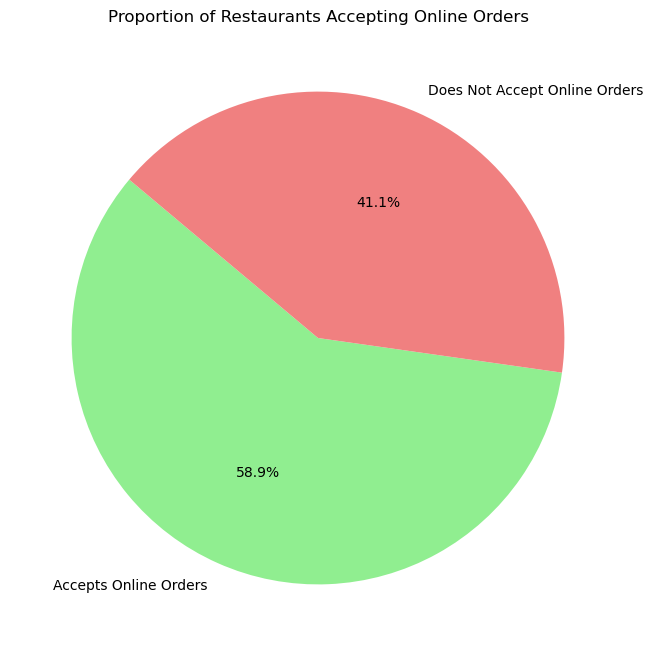

In [5]:
online_order_proportions = df['online_order'].value_counts(normalize=True)

# Creating a pie chart
plt.figure(figsize=(8, 8))
online_order_proportions.plot(kind='pie', labels=['Accepts Online Orders', 'Does Not Accept Online Orders'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proportion of Restaurants Accepting Online Orders')
plt.ylabel('')  # Hiding the y-label for clarity in a pie chart
plt.show()

In [6]:
df = df.rename(
    columns={
        "approx_cost(for two people)": "cost",
        "listed_in(type)": "type",
        "listed_in(city)": "city",
    }
)
df["cost"] = df["cost"].astype(str)
df["cost"] = df["cost"].apply(lambda x: x.replace(",", "."))
df["cost"] = df["cost"].astype(float)

fig = px.box(
    df,
    x="online_order",
    y="cost",
    color="online_order",
)

fig.update_layout(
    title="Cost comparison for Online order",
    titlefont={"size": 30},
    template="simple_white",
)
fig.show()

In [7]:
px.bar(
    df,
    x="location",
    y="votes",
    labels={"value": "Sum of Values"},
)

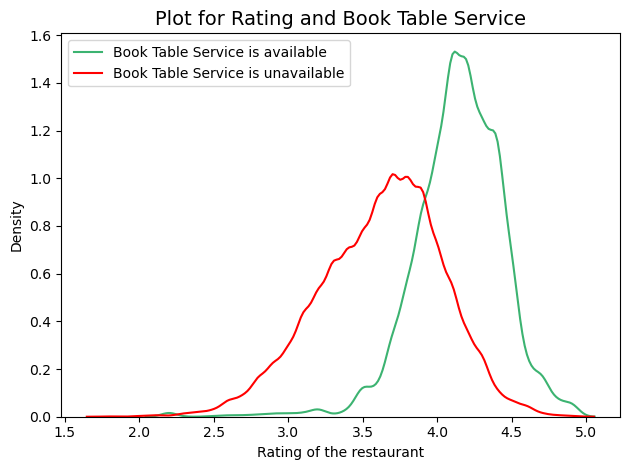

In [8]:
import seaborn as sns

df["rate_num"] = df["rate"].astype(str).apply(lambda x: x.split("/")[0])
df["rate_num"] = pd.to_numeric(df["rate_num"], errors="coerce")

fig, ax = plt.subplots()

sns.kdeplot(
    df.query('rate_num > 0 & book_table == "Yes"')["rate_num"],
    color="mediumseagreen",
    label="Book Table Service is available",
)
sns.kdeplot(
    df.query('rate_num > 0 & book_table == "No"')["rate_num"],
    color="red",
    label="Book Table Service is unavailable",
)
ax.set_title("Plot for Rating and Book Table Service", size=14)
ax.set_xlabel("Rating of the restaurant")
ax.legend()
plt.tight_layout()

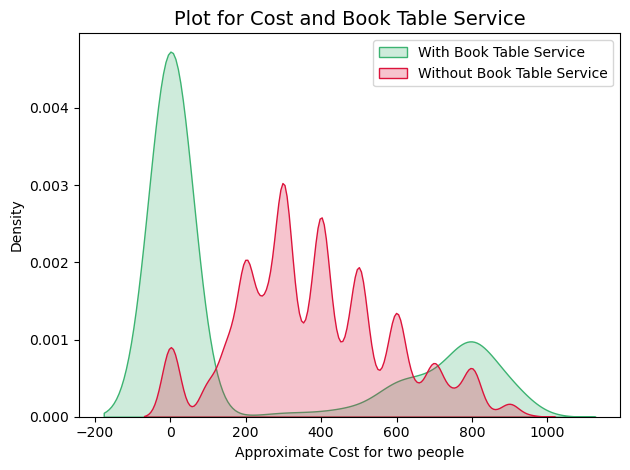

In [9]:
fig, ax = plt.subplots()
sns.kdeplot(
    df.query('cost > 0 & book_table == "Yes"')[
        "cost"
    ],
    color="mediumseagreen",
    shade=True,
    label="With Book Table Service",
)
sns.kdeplot(
    df.query('cost > 0 & book_table == "No"')[
        "cost"
    ],
    color="crimson",
    shade=True,
    label="Without Book Table Service",
)

ax.set_title("Plot for Cost and Book Table Service", size=14)
ax.set_xlabel("Approximate Cost for two people")
ax.legend()
plt.tight_layout()

### Get the mean and standard deviation

In [10]:
df["rate_num"] = df["rate"].astype(str).apply(lambda x: x.split("/")[0])
df["rate_num"] = pd.to_numeric(df["rate_num"], errors="coerce")
mean, std = norm.fit(df.query('rate_num > 0 & book_table =="Yes"')['rate_num'])
print(f"Mean and Std when Book Table is available: {mean}, {std}")

mean, std = norm.fit(df.query('rate_num > 0 & book_table =="No"')['rate_num'])
print(f"Mean and Std when Book Table is unavailable: {mean}, {std}")


Mean and Std when Book Table is available: 4.143464467005076, 0.30197392482709057
Mean and Std when Book Table is unavailable: 3.621469981052572, 0.4137118437005144


### Perform T test and plot the fit

In [11]:

def plot_and_perform_ttest_rating_book_table():

    plt.subplot(2,2,1)
    plt.hist(df.query('rate_num > 0 & book_table =="Yes"')['rate_num'], density=True,bins=5)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, label='pdf')
    plt.xlabel('Rating of restaurant')
    plt.title('Book Table service is available')
    plt.show()

    plt.subplot(2,2,2)
    plt.hist(df.query('rate_num > 0 & book_table =="No"')['rate_num'], density=True,bins=10)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, label='pdf')
    plt.xlabel('Rating of restaurant')
    plt.title('Book Table service is unavailable')

    plt.show()


    print(ttest_1samp(a = df.query('rate_num > 0 & book_table =="Yes"')['rate_num'], popmean=4.14))
    print(ttest_1samp(a = df.query('rate_num > 0 & book_table =="No"')['rate_num'], popmean=3.6214))

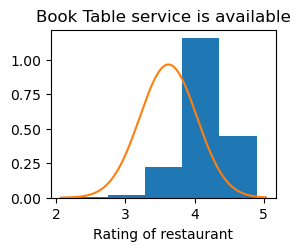

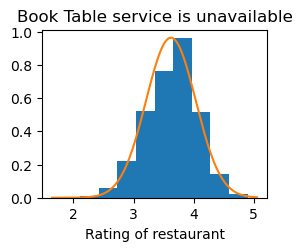

Ttest_1sampResult(statistic=0.9108369481303978, pvalue=0.3624161226626035)
Ttest_1sampResult(statistic=0.031808167119425045, pvalue=0.9746252130387685)


In [12]:
plot_and_perform_ttest_rating_book_table()

### Create encoded data

In [16]:
df = pd.read_csv('zomato.csv')
def create_encoded_df(input_df):
    input_df.drop(['url','phone','dish_liked'],axis=1,inplace=True)
    input_df.drop_duplicates(inplace=True)
    input_df.dropna(how='any',inplace=True)
    input_df = input_df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
    input_df['cost']=input_df['cost'].astype(str)
    input_df['cost'] = input_df['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
    input_df['cost'] = input_df['cost'].astype(float)

    input_df = input_df.loc[input_df.rate !='NEW']
    input_df = input_df.loc[input_df.rate !='-'].reset_index(drop=True)
    remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
    input_df.rate = input_df.rate.apply(remove_slash).str.strip().astype('float')
    input_df['rate'].head()
    input_df.name = input_df.name.apply(lambda x:x.title())
    input_df.online_order.replace(('Yes','No'),(True, False),inplace=True)
    input_df.book_table.replace(('Yes','No'),(True, False),inplace=True)

    output_df = pd.DataFrame()
    for column in input_df.columns[~input_df.columns.isin(['rate_num','cost','votes'])]:
        output_df[column] = pd.factorize(input_df[column])[0]
    return output_df

prediction_df = create_encoded_df(df.copy())


### Get correlation

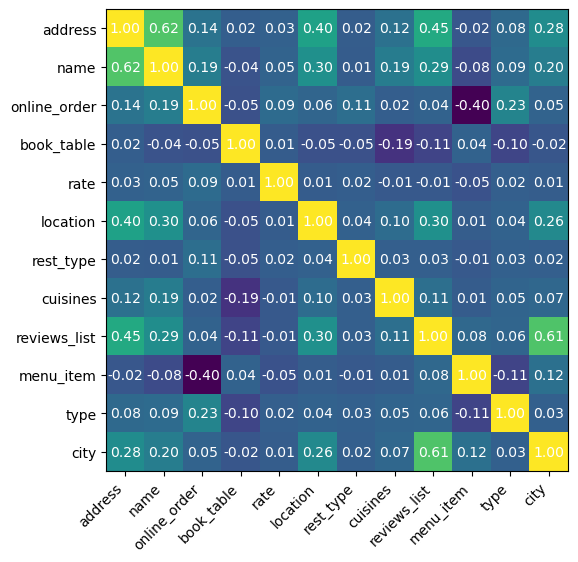

In [17]:
def get_correlation(df):
    corr = df.corr(method="kendall")
    plt.figure(figsize=(6, 6))
    plt.imshow(corr)
    corr_data = corr.to_numpy()
    plt.xticks(np.arange(len(corr)), labels=list(corr.columns))
    plt.yticks(np.arange(len(corr)), labels=list(corr.columns))
    plt.xticks(rotation=45, ha='right')
    for i in range(12):
        for j in range(12):
            plt.annotate('{0:.2f}'.format(corr_data[i][j]), xy=(j, i),
                         ha='center', va='center', color='white', annotation_clip=True)
    plt.savefig('research_corr.jpg')
    plt.show()
get_correlation(prediction_df)

### Train and test ML models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

def get_train_test_split(input_df):

    x = input_df.iloc[:,[2,3,5,6,7,8,9,11]]
    y = input_df['rate']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    return {'x_train': x_train, 'y_train':y_train, 'x_test':x_test, 'y_test':y_test}

def fit_model(model,data):
    model.fit(data['x_train'], data['y_train'])
    y_predicted = model.predict(data['x_test'])
    r2 = r2_score(data['y_test'],y_predicted)
    mse = mean_squared_error(data['y_test'],y_predicted)

    print(f"R2 Score of {model.__repr__()} is {r2}")
    print(f"MSE Score of {model.__repr__()} is {mse}")
    return r2, mse

data = get_train_test_split(prediction_df)



r2 = []
mse = []

LRmodel=LinearRegression()
metrics = fit_model(LRmodel, data)
r2.append(metrics[0])
mse.append(metrics[1])

DTmodel=DecisionTreeRegressor(min_samples_leaf=.0001)
metrics = fit_model(DTmodel, data)
r2.append(metrics[0])
mse.append(metrics[1])

RFmodel=RandomForestRegressor(n_estimators=100,random_state=42,min_samples_leaf=.0001)
metrics = fit_model(RFmodel, data)
r2.append(metrics[0])
mse.append(metrics[1])


GBmodel=GradientBoostingRegressor()
metrics = fit_model(GBmodel, data)
r2.append(metrics[0])
mse.append(metrics[1])





R2 Score of LinearRegression() is 0.012971694196955319
MSE Score of LinearRegression() is 36.39514558179139
R2 Score of DecisionTreeRegressor(min_samples_leaf=0.0001) is 0.452399388798723
MSE Score of DecisionTreeRegressor(min_samples_leaf=0.0001) is 20.191927473785466
R2 Score of RandomForestRegressor(min_samples_leaf=0.0001, random_state=42) is 0.5536198481290605
MSE Score of RandomForestRegressor(min_samples_leaf=0.0001, random_state=42) is 16.45957924068572
R2 Score of GradientBoostingRegressor() is 0.07438268091564304
MSE Score of GradientBoostingRegressor() is 34.130710216759326


### Plot results for ML models


Text(0.5, 1.0, 'R2 score for different Machine Learning models')

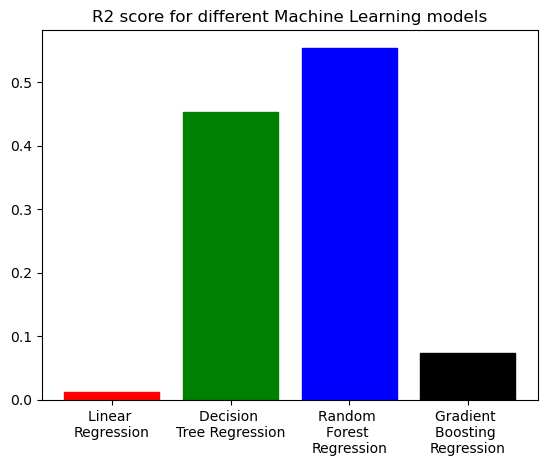

In [19]:
x = [f'Linear \nRegression', 'Decision \nTree Regression', 'Random \nForest \nRegression', 'Gradient \nBoosting \nRegression']
y = r2
my_colors = 'rgbkymc'

barlist = plt.bar(x, y)
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')
barlist[3].set_color('k')
plt.savefig('R2Score.jpg')
plt.title('R2 score for different Machine Learning models')


Text(0.5, 1.0, 'MSE score for different Machine Learning models')

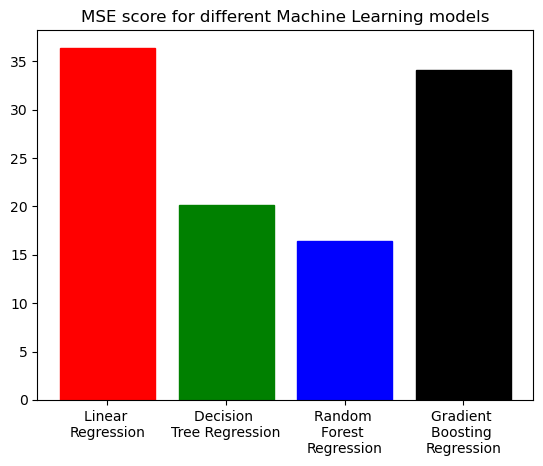

In [20]:
x = [f'Linear \nRegression', 'Decision \nTree Regression', 'Random \nForest \nRegression', 'Gradient \nBoosting \nRegression']
y = mse
my_colors = 'rgbkymc'

barlist = plt.bar(x, y)
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')
barlist[3].set_color('k')
plt.savefig('MseScore.jpg')
plt.title('MSE score for different Machine Learning models')
